In [1]:
#Universidade Federal de Pernambuco
#Disciplina: Introdução a microssimulação
#Professor: Jose Ricardo Nogueira
#Aluno: Paulo Francisco da Silva Junior

In [2]:
#importações
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Breve analise de indicadores de pobreza e desigualdade no Brasil utilizando a pnadc 2017

Utilizando o banco de microdados “PNADC_2017” e a sintaxe de
indicadores de pobreza, calcule o número de pobres para o Brasil, antes e
depois das transferências governamentais.

In [3]:
#Lendo banco e ajustando missings
pnadc = pd.read_csv("/content/drive/MyDrive/Microsimulação/PNADC_2017.csv", sep=";", decimal=",", dtype=float, na_values=" ")
pnadc.fillna(0,inplace=True)

In [4]:
# INDICADORES DE POBREZA
# LINHA DE POBREZA = 406,00/mês (correspondente a US$5,50/dia (BANCO MUNDIAL))
# POBRES (estemos utilizando a Renda Domiciliar Bruta Per Capita (RDBPC))

In [5]:
#Filtrando pobres (ANTERIOMENTE A TRANSFERENCIAS GOVERNAMENTAIS)
pnadc.loc[pnadc["RDIPC"]<=406, "POBRE_ATG"] = 1
pnadc.fillna(value={"POBRE_ATG":0},inplace=True)

In [6]:
# CÁLCULO DO NÚMERO DE POBRES (ANTERIOMENTE A TRANSFERENCIAS GOVERNAMENTAIS)
(pnadc["POBRE_ATG"]*pnadc["PESO"]).sum()

83272953.0

In [7]:
#Filtrando pobres (POSTERIOMENTE A TRANSFERENCIAS GOVERNAMENTAIS)
pnadc.loc[pnadc["RDBPC"]<=406, "POBRE_PTG"] = 1
pnadc.fillna(value={"POBRE_PTG":0},inplace=True)

In [8]:
# CÁLCULO DO NÚMERO DE POBRES (POSTERIOMENTE A TRANSFERENCIAS GOVERNAMENTAIS) - Antes de impostos diretos e indiretos
(pnadc["POBRE_PTG"]*pnadc["PESO"]).sum()

45759984.0

Utilizando o banco de microdados “PNADC_2017” e a sintaxe de
indicadores de desigualdade, calcule o coeficiente de Gini para o Brasil,
antes e depois das transferências governamentais.

In [9]:
# Ordenando valores e rearranjando index 
pnadc.sort_values(by="RDIPC",ascending=True,inplace=True)
pnadc.reset_index(drop=True,inplace=True)

In [10]:
# Calculando renda inicial de acordo com os pesos
pnadc["incomeIni"] = (pnadc["RDIPC"])*pnadc["PESO"]

In [11]:
# Proporção acumulada da renda
pnadc["incomeIniCumProp"] = pnadc["incomeIni"].cumsum()/pnadc["incomeIni"].sum()

In [12]:
# Proporção acumulada das pessoas
pnadc["pessoasCumProp"] = pnadc["PESO"].cumsum()/pnadc["PESO"].sum()

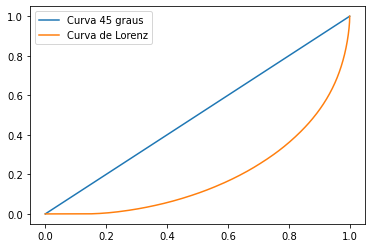

In [13]:
# Plotando gráfico
plt.plot(pnadc["pessoasCumProp"],pnadc["pessoasCumProp"], label="Curva 45 graus")
plt.plot(pnadc["pessoasCumProp"],pnadc["incomeIniCumProp"], label = "Curva de Lorenz")
plt.xlabel="Proporção da População Acumulada"
plt.ylabel="Proporção da Renda Acumulada"
plt.legend()
plt.show()

In [14]:
# Calculando Gini (A/(A+B))
# A + B = 0.5
# A = 0.5 - B

In [15]:
# np.trapz calcula área abaixo da curva
(0.5 - np.trapz(pnadc["incomeIniCumProp"],pnadc["pessoasCumProp"]))/0.5

0.621555146955826

Calculos adicionais

In [ ]:
# HIATO DE POBREZA - Renda Domiciliar Bruta Per Capita
pnadc.loc[pnadc["RDBPC"]<=406.00,"Hiato_Pobreza"]= 406.00 - pnadc["RDBPC"]
pnadc.fillna(value={"Hiato_Pobreza":0},inplace=True)

# CÁLCULO DO VALOR DO HIATO AGREGADO DE POBREZA
(pnadc["Hiato_Pobreza"]*pnadc["PESO"]).sum()

7848699361.27